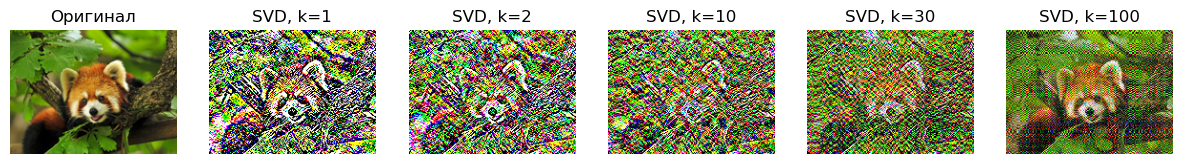

Размер оригинального изображения: 46583 байт
Размер сжатого изображения (k=1): 11347 байт
Размер сжатого изображения (k=2): 12397 байт
Размер сжатого изображения (k=10): 15415 байт
Размер сжатого изображения (k=30): 17313 байт
Размер сжатого изображения (k=100): 19831 байт


In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('C:\\Users\\Admin-100n\\Downloads\\panda.jpg')
w, h = img.size
img = img.resize((w//4, h//4))
X = np.array(img, dtype=np.float32)

def reconstruct_image(U, S, V, k):
    S_k = np.zeros((U.shape[0], V.shape[0]))
    np.fill_diagonal(S_k, S[:k])
    Y_k = np.dot(U, np.dot(S_k, V))
    return np.clip(Y_k, 0, 255).astype(np.uint8)

ks = [1, 2, 10, 30, 100]
fig, axes = plt.subplots(1, len(ks)+1, figsize=(15, 5))

axes[0].imshow(X.astype(np.uint8))
axes[0].axis('off')
axes[0].set_title('Оригинал')

for i, k in enumerate(ks):
    Y_k = np.zeros_like(X)
    for channel in range(3):  
        U, S, V = np.linalg.svd(X[:,:,channel], full_matrices=False)
        Y_k[:,:,channel] = reconstruct_image(U, S, V, k)
    axes[i+1].imshow(Y_k.astype(np.uint8))
    axes[i+1].axis('off')
    axes[i+1].set_title(f'SVD, k={k}')

plt.show()
import os
img.save('original_image.png')
original_size = os.path.getsize('original_image.png')

compressed_sizes = []
for k in ks:
    Y_k = reconstruct_image(U, S, V, k)
    compressed_img = Image.fromarray(Y_k)
    compressed_img.save(f'compressed_k_{k}.png')
    compressed_sizes.append(os.path.getsize(f'compressed_k_{k}.png'))

print(f'Размер оригинального изображения: {original_size} байт')
for k, size in zip(ks, compressed_sizes):
    print(f'Размер сжатого изображения (k={k}): {size} байт')



Матрица ковариации:
 [[0.14262646 0.12812636]
 [0.12812636 0.13190244]]


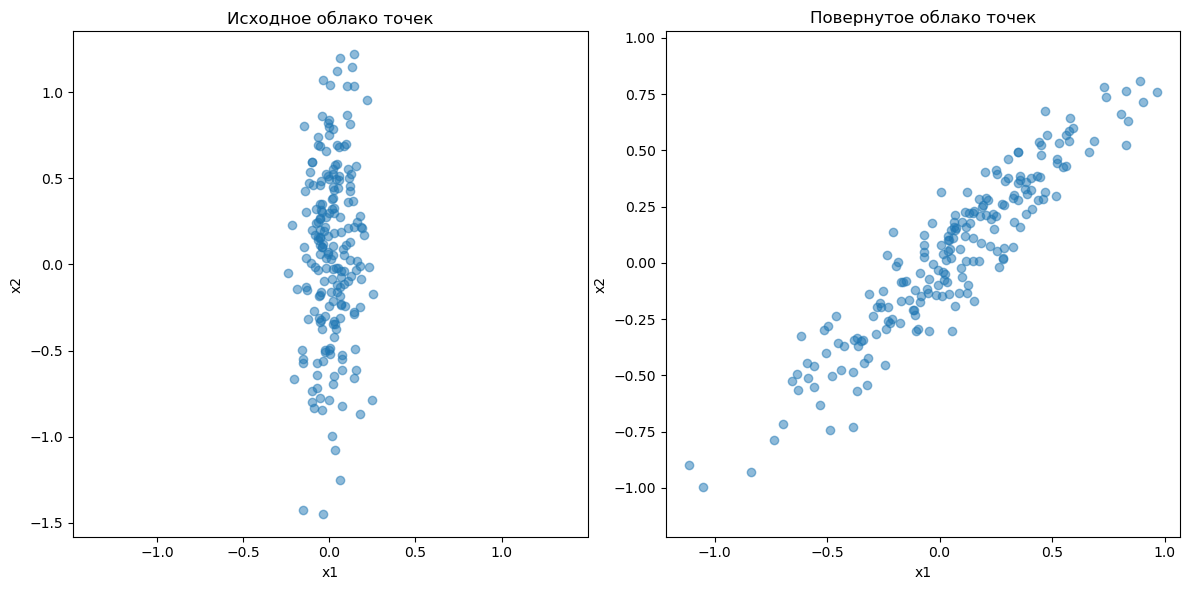

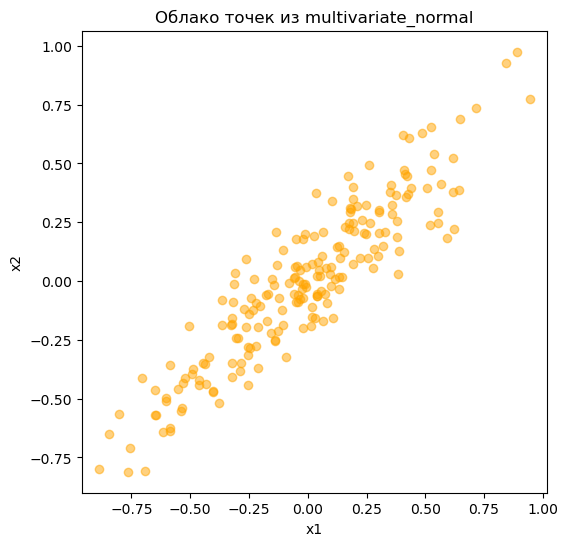

In [20]:
import numpy as np
import matplotlib.pyplot as plt
M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2

X = np.concatenate((x1, x2), axis=1)

alpha = np.pi / 4  # 45 градусов
c, s = np.cos(alpha), np.sin(alpha)

R = np.array([[c, -s], [s, c]])

X_rotated = X.dot(R)
# матрица ковариации
cov_matrix = np.cov(X_rotated, rowvar=False)
print("Матрица ковариации:\n", cov_matrix)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Исходное облако точек')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

# Повернутые
plt.subplot(1, 2, 2)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.5)
plt.title('Повернутое облако точек')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

plt.tight_layout()
plt.show()

mean = [0, 0]
cov = cov_matrix  
X_mvn = np.random.multivariate_normal(mean, cov, size=M)

plt.figure(figsize=(6, 6))
plt.scatter(X_mvn[:, 0], X_mvn[:, 1], alpha=0.5, color='orange')
plt.title('Облако точек из multivariate_normal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()


Среднее значение (μ): [0.0113808  0.00936765]
Матрица ковариации (C):
 [[0.00904679 0.0035284 ]
 [0.0035284  0.24289803]]


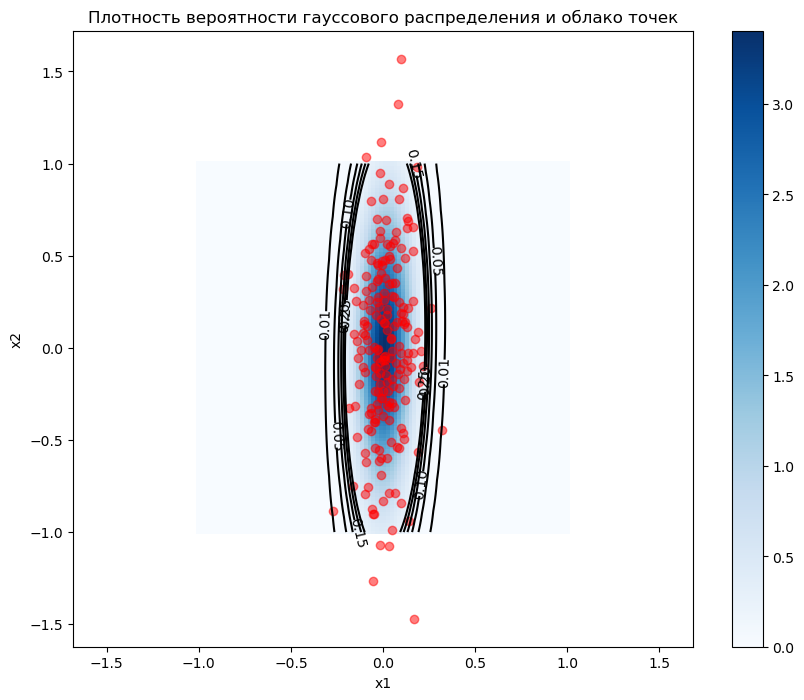

In [22]:
from scipy.stats import multivariate_normal
M = 200
sigma1 = 0.1
sigma2 = 0.5

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

mu = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

print("Среднее значение (μ):", mu)
print("Матрица ковариации (C):\n", cov_matrix)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Оценка плотности вероятности
m = multivariate_normal(mean=mu, cov=cov_matrix)
ZZ = m.pdf(pp).reshape(XX.shape)

plt.figure(figsize=(10, 8))

IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='Blues')
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color='red')
plt.title('Плотность вероятности гауссового распределения и облако точек')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()


Класс 0: Среднее (μ0): [0.00200559 0.0122554 ]
Класс 0: Ковариация (C0):
 [[ 0.09173808 -0.00260803]
 [-0.00260803  0.09310951]]
Класс 1: Среднее (μ1): [0.98078609 0.99496292]
Класс 1: Ковариация (C1):
 [[ 0.10223943 -0.00234079]
 [-0.00234079  0.10087461]]


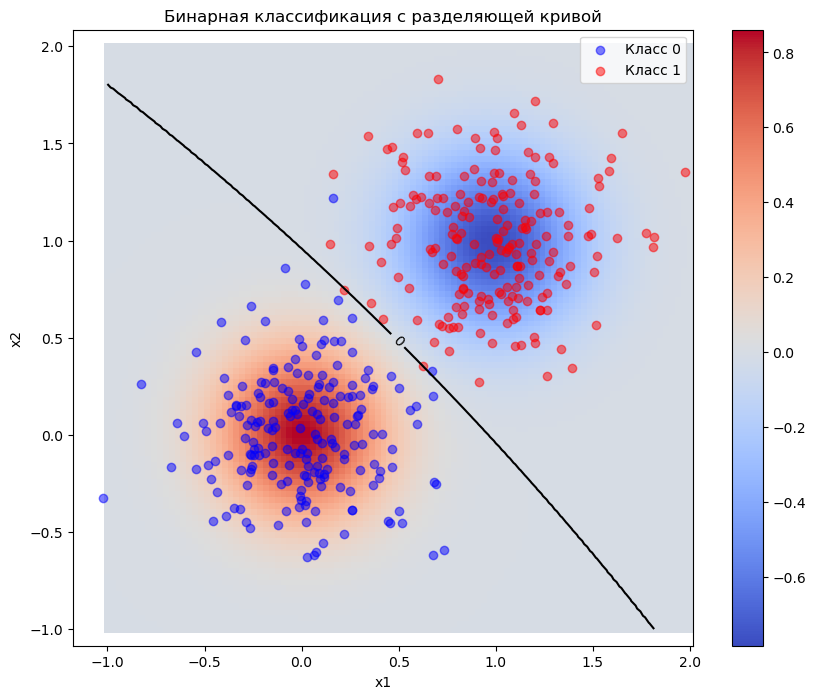

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.random.seed(42)  
M = 200  

mu0 = np.array([0, 0])  # Среднее
cov0 = np.array([[0.1, 0], [0, 0.1]])  # Ковариация
X0 = np.random.multivariate_normal(mu0, cov0, M)

mu1 = np.array([1, 1]) 
cov1 = np.array([[0.1, 0], [0, 0.1]]) 
X1 = np.random.multivariate_normal(mu1, cov1, M)

mu0 = np.mean(X0, axis=0)
mu1 = np.mean(X1, axis=0)

# Матрицы ковариации
cov0 = np.cov(X0, rowvar=False)
cov1 = np.cov(X1, rowvar=False)

print("Класс 0: Среднее (μ0):", mu0)
print("Класс 0: Ковариация (C0):\n", cov0)
print("Класс 1: Среднее (μ1):", mu1)
print("Класс 1: Ковариация (C1):\n", cov1)

xx = np.linspace(-1, 2, 100)
yy = np.linspace(-1, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
p_y0 = M / (2 * M)  
p_y1 = M / (2 * M)  

p_x_given_y0 = multivariate_normal.pdf(pp, mean=mu0, cov=cov0).reshape(XX.shape)
p_x_given_y1 = multivariate_normal.pdf(pp, mean=mu1, cov=cov1).reshape(XX.shape)

difference = p_x_given_y0 * p_y0 - p_x_given_y1 * p_y1
plt.figure(figsize=(10, 8))

IMG = plt.pcolor(XX, YY, difference, shading='auto', cmap='coolwarm')
plt.colorbar(IMG)

plt.scatter(X0[:, 0], X0[:, 1], alpha=0.5, color='blue', label='Класс 0')
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, color='red', label='Класс 1')

CS = plt.contour(XX, YY, difference, levels=[0], colors='black')
plt.clabel(CS, inline=True, fontsize=10)
plt.title('Бинарная классификация с разделяющей кривой')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.legend()
plt.show()


Среднее (μ0): [0.00200559 0.0122554 ]
Среднее (μ1): [0.98078609 0.99496292]
Общая ковариация (C):
 [[0.33684875 0.2385982 ]
 [0.2385982  0.33878257]]


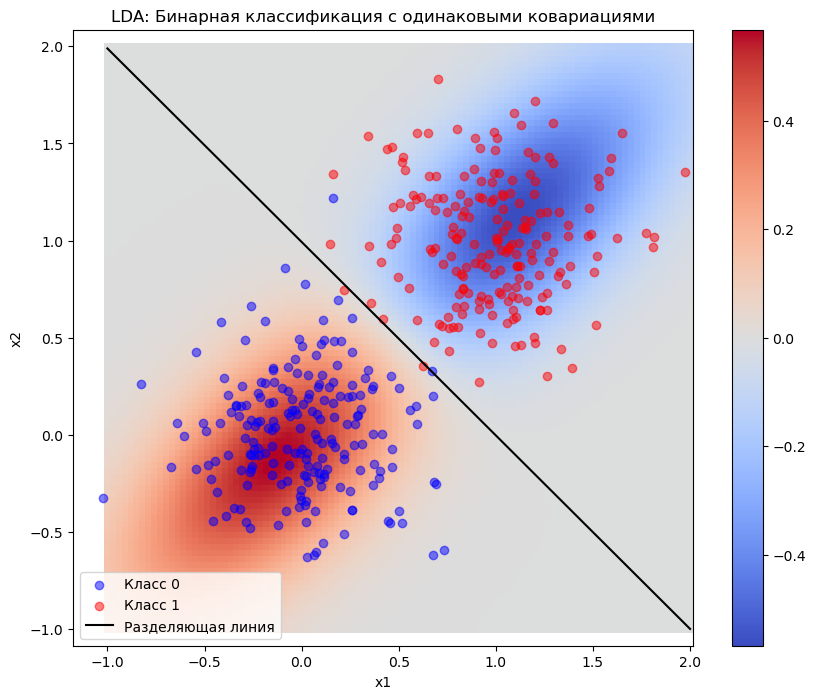

In [26]:
np.random.seed(42)
M = 200

mu0 = np.array([0, 0])
cov = np.array([[0.1, 0], [0, 0.1]])  
X0 = np.random.multivariate_normal(mu0, cov, M)

mu1 = np.array([1, 1])
X1 = np.random.multivariate_normal(mu1, cov, M)

cov_common = np.cov(np.vstack([X0, X1]), rowvar=False)
mu0 = np.mean(X0, axis=0)
mu1 = np.mean(X1, axis=0)

print("Среднее (μ0):", mu0)
print("Среднее (μ1):", mu1)
print("Общая ковариация (C):\n", cov_common)

xx = np.linspace(-1, 2, 100)
yy = np.linspace(-1, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

p_x_given_y0 = multivariate_normal.pdf(pp, mean=mu0, cov=cov_common).reshape(XX.shape)
p_x_given_y1 = multivariate_normal.pdf(pp, mean=mu1, cov=cov_common).reshape(XX.shape)

difference = p_x_given_y0 - p_x_given_y1

plt.figure(figsize=(10, 8))

IMG = plt.pcolor(XX, YY, difference, shading='auto', cmap='coolwarm')
plt.colorbar(IMG)

plt.scatter(X0[:, 0], X0[:, 1], alpha=0.5, color='blue', label='Класс 0')
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, color='red', label='Класс 1')

w = np.linalg.inv(cov_common).dot(mu1 - mu0)
b = -0.5 * (mu1.T.dot(np.linalg.inv(cov_common)).dot(mu1) - mu0.T.dot(np.linalg.inv(cov_common)).dot(mu0))

x_vals = np.linspace(-1, 2, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

plt.plot(x_vals, y_vals, color='black', label='Разделяющая линия')

plt.title('LDA: Бинарная классификация с одинаковыми ковариациями')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.legend()
plt.show()
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.cov = None
        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
        self.cov = np.cov(X, rowvar=False)
    
    def predict(self, X):
        predictions = []
        for x in X:
            scores = {}
            for cls in self.classes:
                w = np.linalg.inv(self.cov).dot(self.means[cls])
                b = -0.5 * (self.means[cls].T.dot(np.linalg.inv(self.cov)).dot(self.means[cls]))
                scores[cls] = w.dot(x) + b
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)



Точность наивного байесового классификатора: 0.99


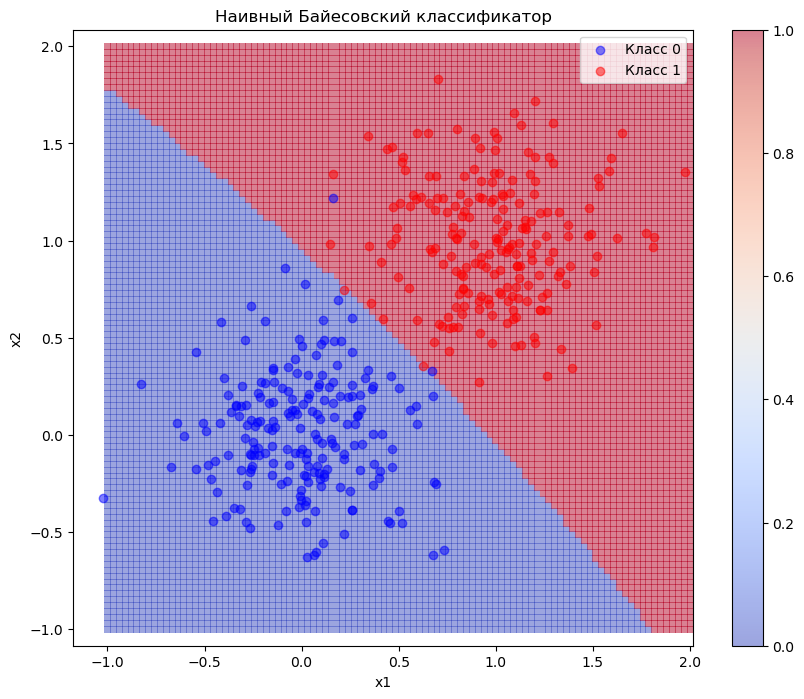

In [25]:
import numpy as np
from sklearn.base import BaseEstimator
class myNB(BaseEstimator):
    def __init__(self):
        self.params = {}
        self.class_priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            mean = np.mean(X_cls, axis=0)
            var = np.var(X_cls, axis=0)
            self.params[cls] = (mean, var)
            self.class_priors[cls] = len(X_cls) / len(X)

    def predict(self, X):
        predictions = []
        
        for x in X:
            class_probabilities = {}
            for cls in self.classes:
                mean, var = self.params[cls]
                prior = self.class_priors[cls]
                likelihood = np.prod(self.gaussian_pdf(x, mean, var))
                
                class_probabilities[cls] = likelihood * prior
            
            predictions.append(max(class_probabilities, key=class_probabilities.get))
        return np.array(predictions)

    def gaussian_pdf(self, x, mean, var):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

np.random.seed(42)
M = 200

mu0 = np.array([0, 0])
cov = np.array([[0.1, 0], [0, 0.1]])  
X0 = np.random.multivariate_normal(mu0, cov, M)

mu1 = np.array([1, 1])
X1 = np.random.multivariate_normal(mu1, cov, M)

X = np.vstack((X0, X1))
y = np.array([0] * M + [1] * M)

nb_classifier = myNB()
nb_classifier.fit(X, y)

predictions = nb_classifier.predict(X)

accuracy = np.mean(predictions == y)
print(f'Точность наивного байесового классификатора: {accuracy:.2f}')

plt.figure(figsize=(10, 8))

xx = np.linspace(-1, 2, 100)
yy = np.linspace(-1, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

predictions_grid = nb_classifier.predict(pp)

plt.pcolor(XX, YY, predictions_grid.reshape(XX.shape), shading='auto', cmap='coolwarm', alpha=0.5)
plt.colorbar()

plt.scatter(X0[:, 0], X0[:, 1], alpha=0.5, color='blue', label='Класс 0')
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, color='red', label='Класс 1')
plt.title('Наивный Байесовский классификатор')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.legend()
plt.show()


NB:
Accuracy: 0.84, Precision: 0.90, Recall: 0.76

LDA:
Accuracy: 0.84, Precision: 0.90, Recall: 0.77


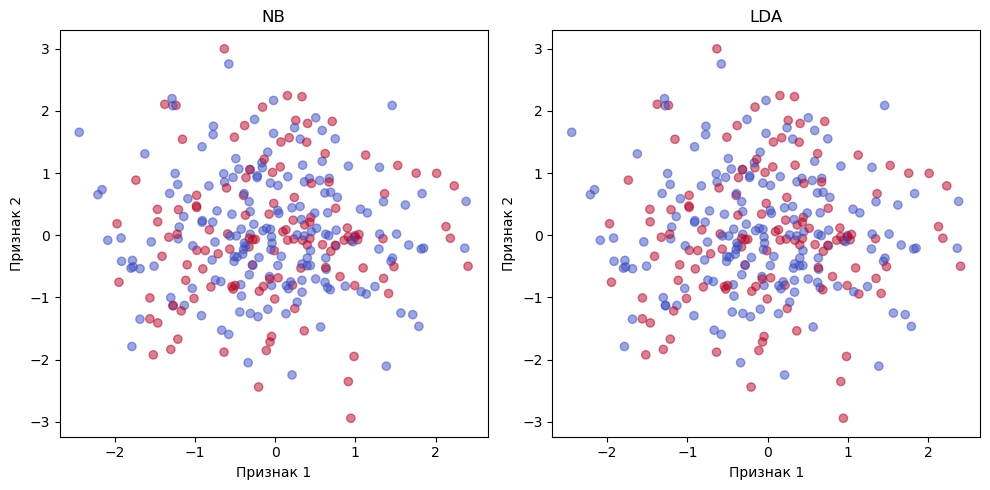

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

lda_predictions = lda_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)

lda_accuracy = accuracy_score(y_test, lda_predictions)
lda_precision = precision_score(y_test, lda_predictions)
lda_recall = recall_score(y_test, lda_predictions)

print("NB:")
print(f"Accuracy: {nb_accuracy:.2f}, Precision: {nb_precision:.2f}, Recall: {nb_recall:.2f}")
print("\nLDA:")
print(f"Accuracy: {lda_accuracy:.2f}, Precision: {lda_precision:.2f}, Recall: {lda_recall:.2f}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("NB")
plt.scatter(X_test[:, 0], X_test[:, 1], c=nb_predictions, cmap='coolwarm', alpha=0.5)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.subplot(1, 2, 2)
plt.title("LDA")
plt.scatter(X_test[:, 0], X_test[:, 1], c=lda_predictions, cmap='coolwarm', alpha=0.5)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


In [ ]:
#получаем, что модель LDA лучше справляется с задачей бинарной классификации, так как у нее больше Recall, а остальное совпадает 